In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/heart_latest.csv')

In [ ]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,55,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types and Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

Dataset Shape: (289, 14)

Column Names: ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']

Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       289 non-null    int64  
 1   sex       289 non-null    int64  
 2   cp        289 non-null    int64  
 3   trtbps    289 non-null    int64  
 4   chol      289 non-null    int64  
 5   fbs       289 non-null    int64  
 6   restecg   289 non-null    int64  
 7   thalachh  289 non-null    int64  
 8   exng      289 non-null    int64  
 9   oldpeak   289 non-null    float64
 10  slp       289 non-null    int64  
 11  caa       289 non-null    int64  
 12  thall     289 non-null    int64  
 13  output    289 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.7 KB
None

Statistical Summary:
         

In [ ]:
print("\nMissing Values Per Column:")
print(df.isnull().sum())


Missing Values Per Column:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [ ]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
print("\nNumerical Features:", num_features)
print("Categorical Features:", cat_features)



Numerical Features: ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
Categorical Features: []


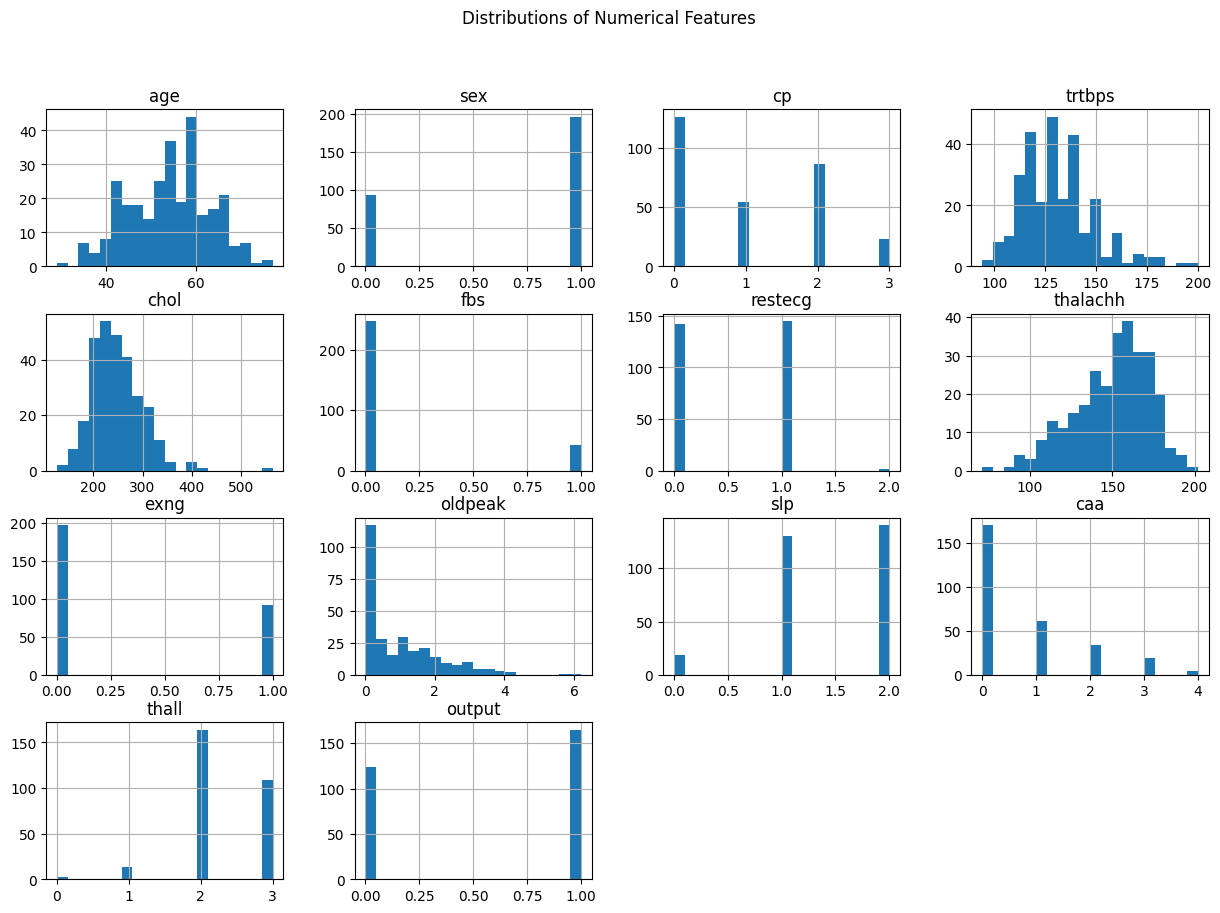

In [ ]:
df[num_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distributions of Numerical Features")
plt.show()

In [ ]:
for col in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot - {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

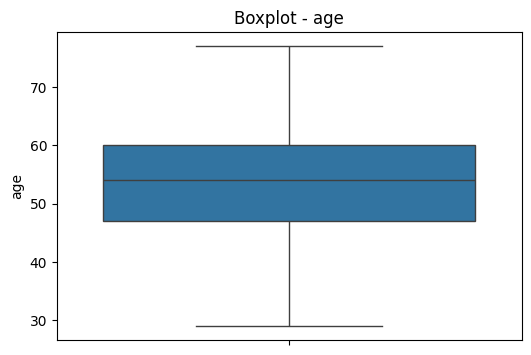

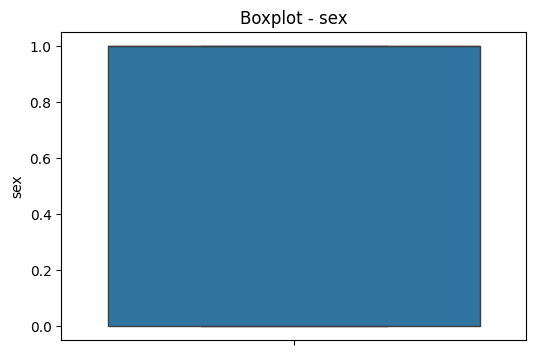

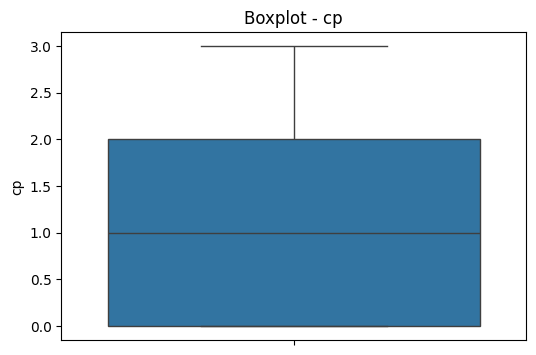

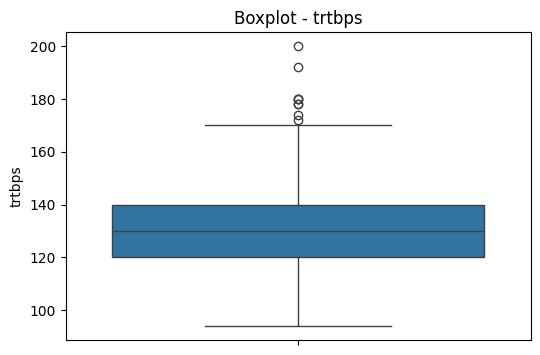

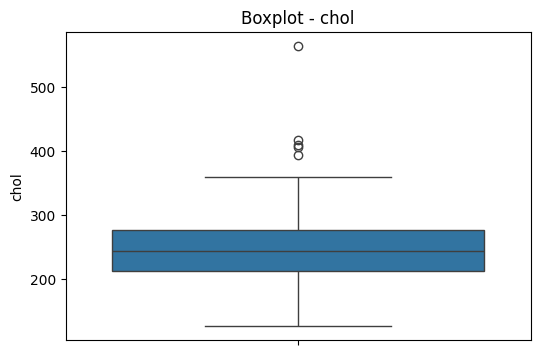

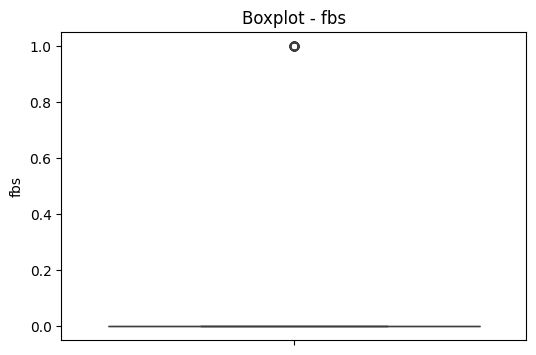

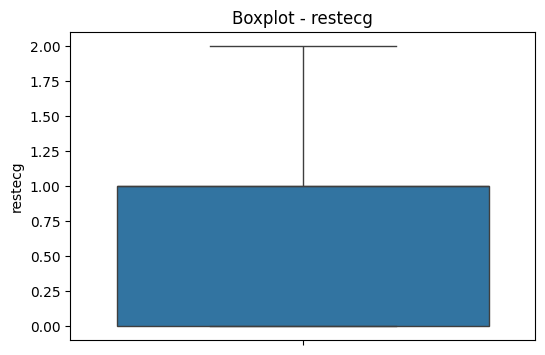

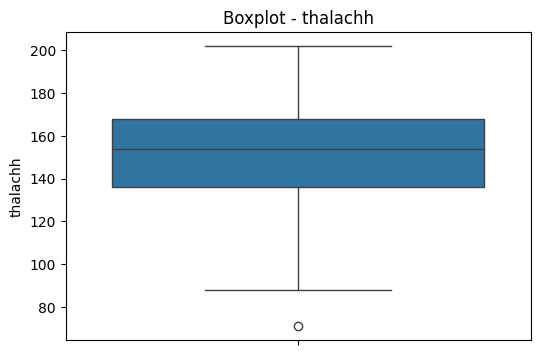

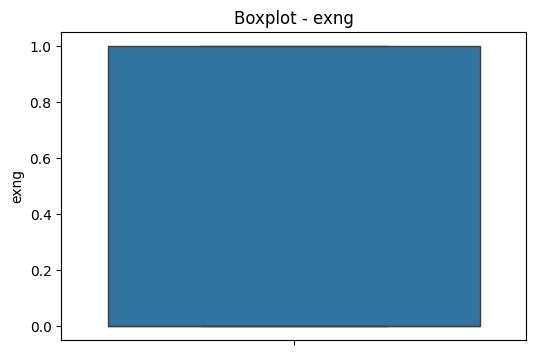

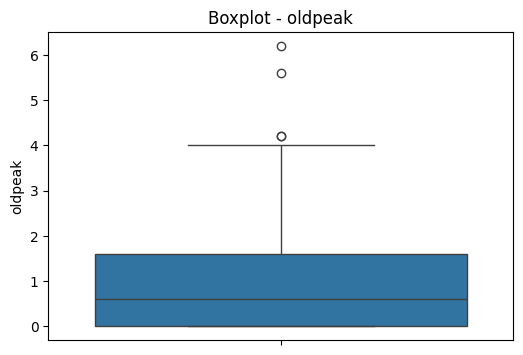

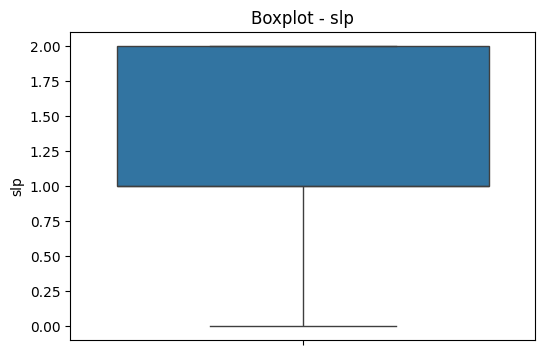

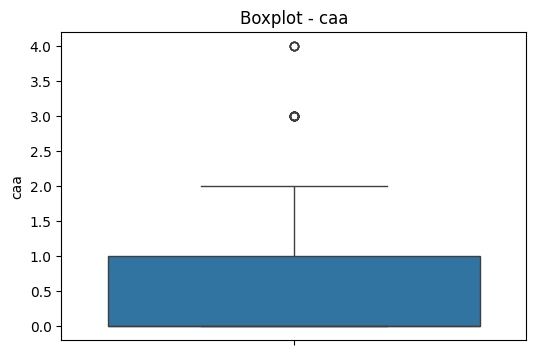

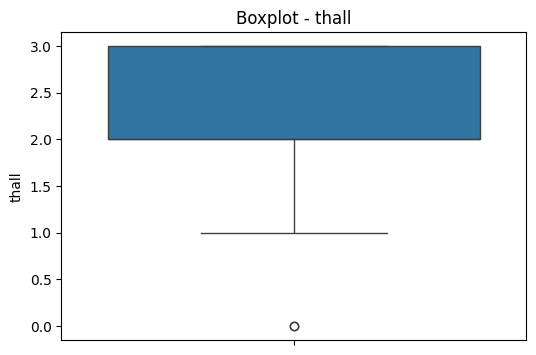

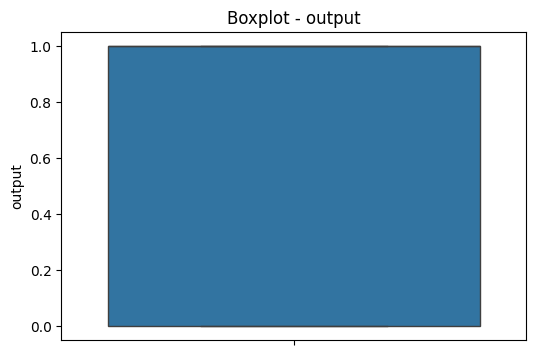

In [ ]:
for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()

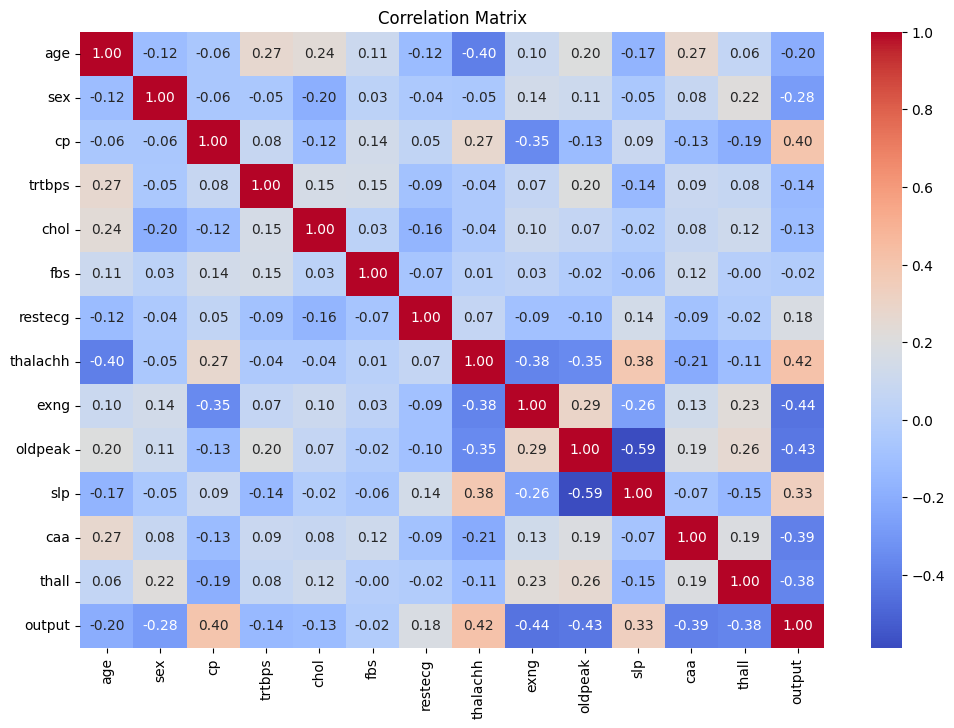

In [ ]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
target_col = 'target' if 'target' in df.columns else None
if target_col:
    for col in num_features:
        if col != target_col:
            plt.figure(figsize=(6, 4))
            sns.boxplot(x=target_col, y=col, data=df)
            plt.title(f"{col} vs {target_col}")
            plt.show()

In [ ]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))]
    return outliers

In [ ]:
for col in num_features:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col} - Outliers: {len(outliers)}")

age - Outliers: 0
sex - Outliers: 0
cp - Outliers: 0
trtbps - Outliers: 9
chol - Outliers: 5
fbs - Outliers: 42
restecg - Outliers: 0
thalachh - Outliers: 1
exng - Outliers: 0
oldpeak - Outliers: 4
slp - Outliers: 0
caa - Outliers: 24
thall - Outliers: 2
output - Outliers: 0


In [ ]:
if target_col:
    print("\nMean of features grouped by target:")
    print(df.groupby(target_col)[num_features].mean())

In [ ]:
print("\nEDA Complete. Summary:")
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")
print(f"Numerical Features: {num_features}")
print(f"Categorical Features: {cat_features}")
print(f"Target Column: {target_col if target_col else 'Not Found'}")


EDA Complete. Summary:
Total Rows: 289
Total Columns: 14
Numerical Features: ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
Categorical Features: []
Target Column: Not Found
